## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lets start our project with Mounting the data to drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the datset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetterCapstoneProjects/EDA Capstone Project(Global Terrorism Analysis)/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#to see if we have the right dataset and to see how the data is distributed among the various features.
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#the last 5 observations of the dataset
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
#the size of the dataset, the number of observations/datapoints and the number of features
df.shape

(181691, 135)

In [ ]:
#to see the baseic descriptive statistics of the dataset, the mean, standard devaiation and the maximum value,minimum value, the interquartile ranges
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#to check the number of NaN values in the columns of the dataset
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**From the output of the above cell, columns like approxdate and related can be removed as almost all of their values are NaN values and they do not help in understanding the dataset. This is done later in the EDA analysis**

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


 **Understanding Data:
The Data is pretty large.**
1. 135 features/columns are present and over 180,000 observation/datapoints are present.
2. The Dataset is pretty large and if we observe, the mean and median of the dataset is almost the same, which means that the distribution is close to normal distribution.
3. All the incidents of terrorism are well documented and have been given IDs whcih is the first column of the dataset.
4. The second column (iyear) is the year, third column (imonth) is the month and the fourth column (iday) is the dd part of the date.
5. The columns country,province,state and city give the country, province and city in the form of an number ID.
6. The country_txt, region_txt, city and provstate give the names of the country, region, city and provstate respectively.
7. The Lattidue and Longitude columns give the exact coordinates of the attack.
8. The columns attacktype1 gives the code of the attack and attacktype1_txt gives the description of the type of attack.
9. The column targtype1 and targtype_txt gives the specific code and description on what assosciation of the terror attack.
10. The weaptype1, weaptype2, weaptype3, weaptype4, weapsubtype1, weapsubtype2, weapsubtype3 and weapsubtype4 give the type of the weapon used.
11. suicide column gives the information whether the terrorist attack was suicidal or not.
12. nwound column gives the number of people wounded in the terrorist attack.
There are various columns that give other information about the attack.

**Cleaning the Dataset**

In [ ]:
#The columns present in the dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Dropping of some columns from the dataset that are not necessary
df.drop(columns=['approxdate','extended','resolution','specificity','vicinity','location'],inplace=True)

In [ ]:
df.drop(columns=['targtype2','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','natlty3','natlty3_txt','gsubname','gname2','gsubname2','gname3','gsubname3','guncertain2','guncertain3','individual','claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt','compclaim','weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt','weaptype3','weaptype3_txt','weapsubtype3','weapsubtype3_txt','weaptype4','weaptype4_txt','weapsubtype4','weapsubtype4_txt','nhostkid','nhostkidus','nhours','ndays','divert','kidhijcountry','ransomamtus','ransompaid','ransompaidus','ransomnote','hostkidoutcome','hostkidoutcome_txt','nreleased','related'],inplace=True)

In [ ]:
#to check the size of the dataset after data cleaning
df.shape

(181691, 70)

**After Data Cleaning we have reduced the number of columns from 135 to 70**

In [ ]:
df.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,ransomamt,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,...,800000.0,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


**The unimportant columns are removed and the Data Cleaning is done**

# Data Visualizations

Text(0, 0.5, 'Number Of Attacks')

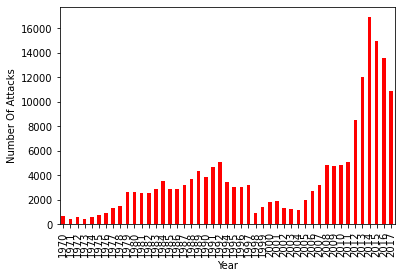

In [ ]:
# we will be plotting the number of terrorist attack against the year of the attack, using a bar plot
df.groupby(['iyear']).size().plot(kind='bar',color='r')
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Year')
plt.ylabel('Number Of Attacks')

**Plotting the trend of the terror attacks with respect to the year of attack. That is to understand the number of terror attacks from 1970 to 2017**

Text(0, 0.5, 'Number Of Attacks')

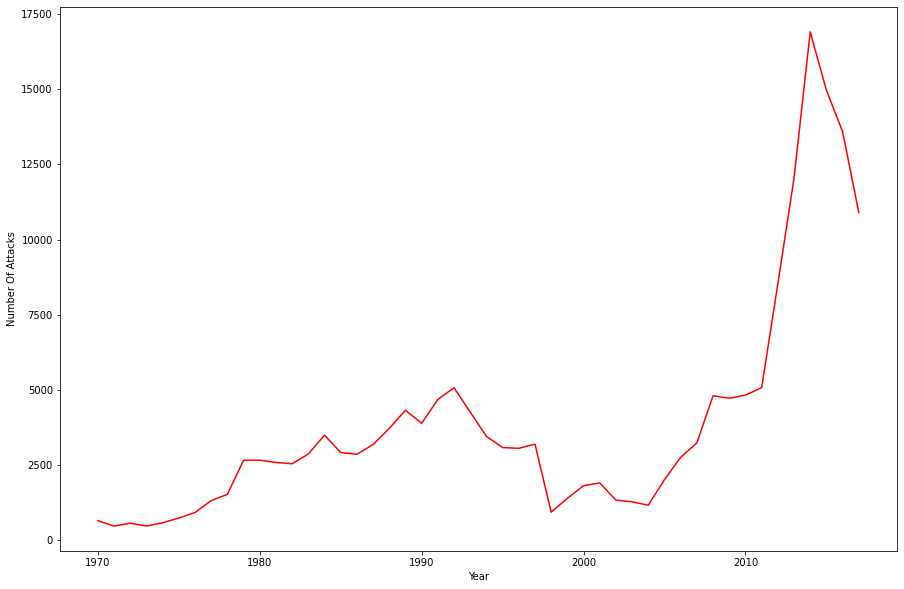

In [ ]:
# we will be plotting the number of terrorist attack against the year of the attack, using a line plot
df.groupby(['iyear']).size().plot(kind='line',color='r')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Year')
plt.ylabel('Number Of Attacks')

**Inference from the above Plot:**
1. The year 2014 has the highest number of attacks.
2. There is a rise in the attacks after 2007, with a sharp increase after 2012.
3. There was a dip from the year 1998 to 2004.

Text(0, 0.5, 'Number Of Attacks')

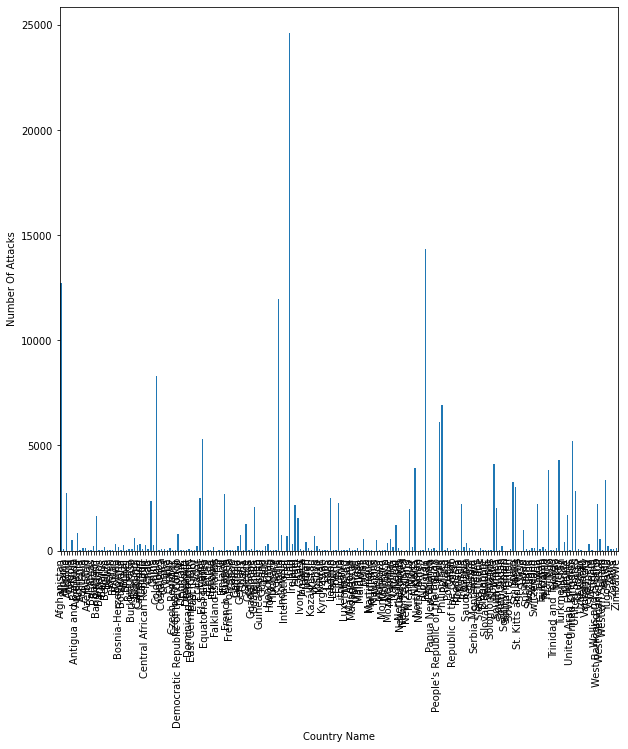

In [ ]:
# plotting the number of attacks per country 
df.groupby(['country_txt']).size().plot(kind='bar')
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('Country Name')
plt.ylabel('Number Of Attacks')

The coutries with highest terror attacks seem to be Afghanistan, Pakistan, Iraq, India, Colombia, United Kingdom and others

In [ ]:
df_new=df.groupby(['country_txt']).count()
# Grouping by country name and sorting them in descending order we have:
df_new=df_new.sort_values(['eventid'],ascending=False)
df_four=df_new['eventid']
df_four.head()

country_txt
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: eventid, dtype: int64

**The topmost countries affected by terrorism are:**
1. Iraq
2. Pakistan
3. Afghanistan
4. India
5. Colombia

**Let us visualize the Region wise terror attacks, in order to understand which region is most susceptible and hence, the most destabilized.**

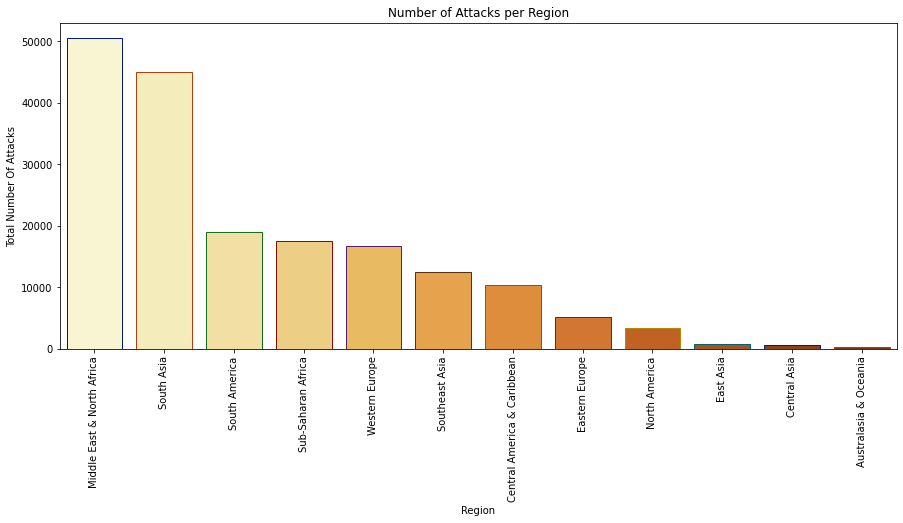

In [ ]:
# barplot has been used to visualize the nmber of terror attack per region
region_wise_attacks = df.region_txt.value_counts().to_frame().reset_index()
region_wise_attacks.columns = ['Region', 'Total Number Of Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_wise_attacks.Region, y=region_wise_attacks['Total Number Of Attacks'], palette='YlOrBr', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number of Attacks per Region')
plt.show()

The most affected regions are:
1. Middle East & North Africa
2. South Asia
3. South America
4. These three regions are also the most backward regions of the world and also the most populous. Iraq and other North African countries responsible for the high terror attacks in the Middle east and North Africa.
While India, Pakistan and Afghanistan contribute the most to South Asia.
South America figures at third place because of Colombia.


**Plotting the number of attacks against the cities is too difficult as there are a lot of cities**

In [ ]:
# Finding top 10 cities that were hit the most 
df_city=df.sort_values(['city'],ascending=False)
df_city=df_city['city']
df_city.head(10)

44393          zinarag
42281         yokohama
19135            yacan
41289          wakunai
19055          vinchos
30493    villavicencio
30790    villavicencio
19587     vilcashuaman
19586     vilcashuaman
19766       valparaiso
Name: city, dtype: object

The cities with the highest number of terror attacks are:
1. Zinarag
2. Yokohama
3. Yacan
4. Wakunai
5. Vinchos

Text(0, 0.5, 'Number Of Attacks')

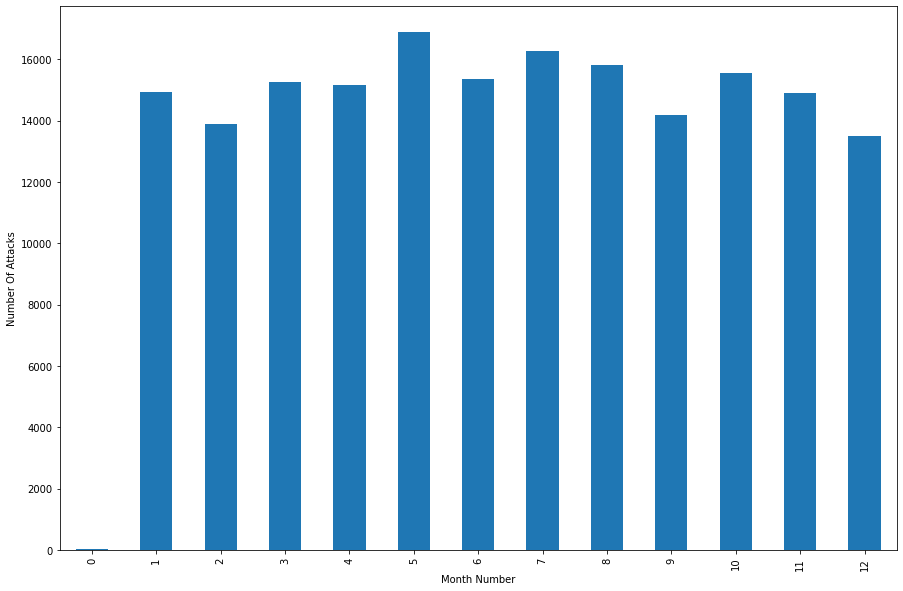

In [ ]:
# plotting the months vs number of attacks
df.groupby(['imonth']).size().plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Month Number')
plt.ylabel('Number Of Attacks')

1. **There isn't really any correlation between the terror attacks and the monthe of the year**
2. **There is a small value at 0 Month number. But that is because the imonth value is 0( it is not valid).**

Let us remove the rows with imonth value 0

In [ ]:
#removing rows with imonth=0 value
df_new_filtered=df[df['imonth']>=1]
df_new_filtered.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,...,ransomamt,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,...,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,...,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,217,United States,1,North America,Illinois,Cairo,...,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9


Text(0, 0.5, 'Number of Attacks')

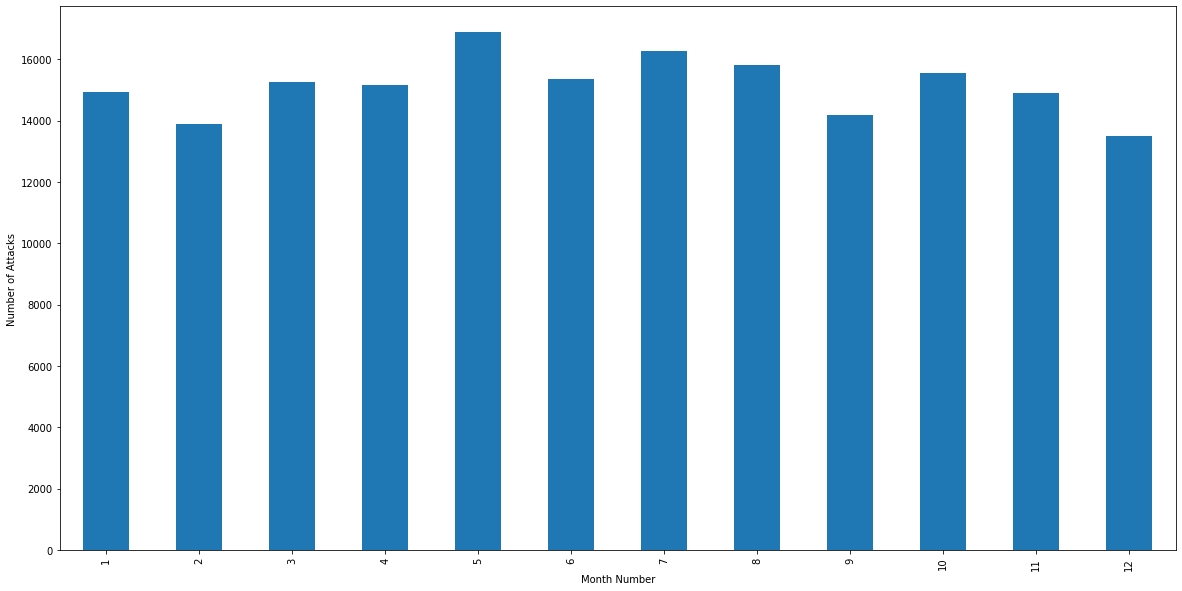

In [ ]:
# plotting the above plot but after we have removed the rows with imonth value as 0
df_new_filtered.groupby(['imonth']).size().plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Month Number')
plt.ylabel('Number of Attacks')

**Hence, we can conclude without any doubt that there isn't any correlation between the month and the number of attacks. The month of the year does not give any info about the number of attacks.**

**Let us visualize the type of terrorist attack that take place the most**

Text(0, 0.5, 'Number Of Attacks')

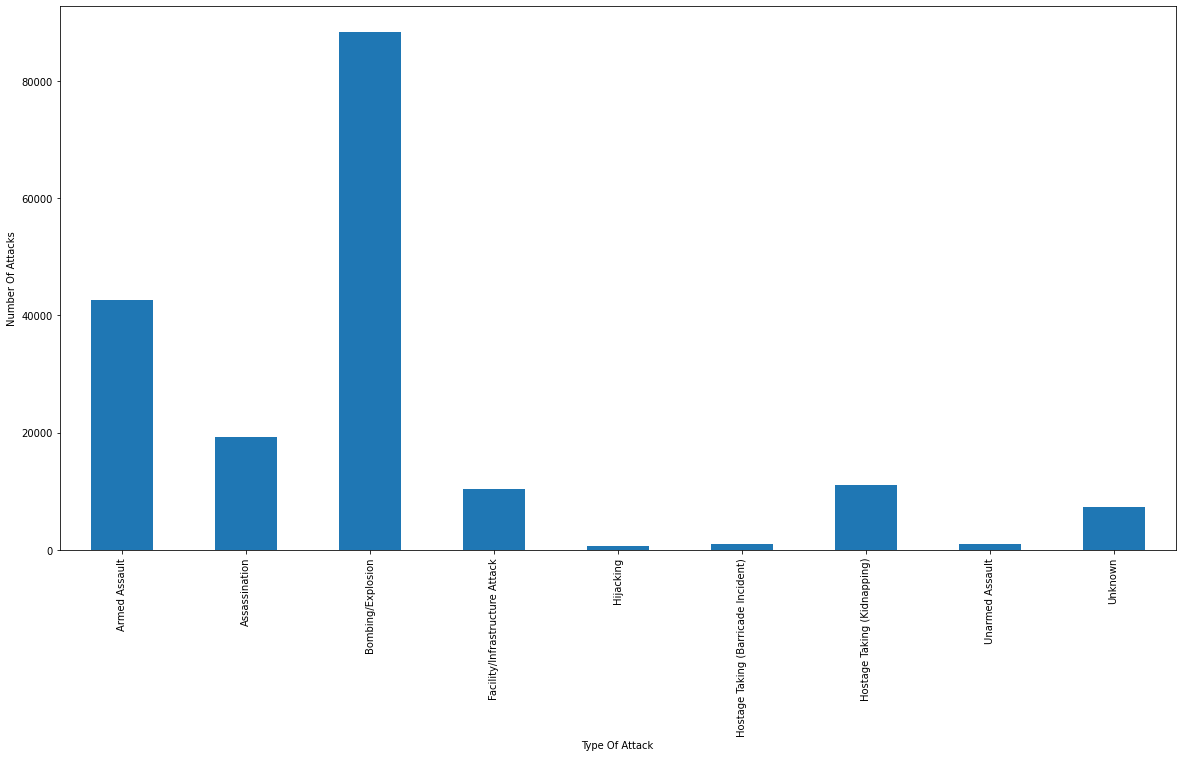

In [ ]:
# plotting type of attack vs the number of attacks
df.groupby(['attacktype1_txt']).size().plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Type Of Attack')
plt.ylabel('Number Of Attacks')

**Bombing/Explosion and Armed Assault are the two most common types of terror attacks across the globe**

**Targets Of Attacks**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

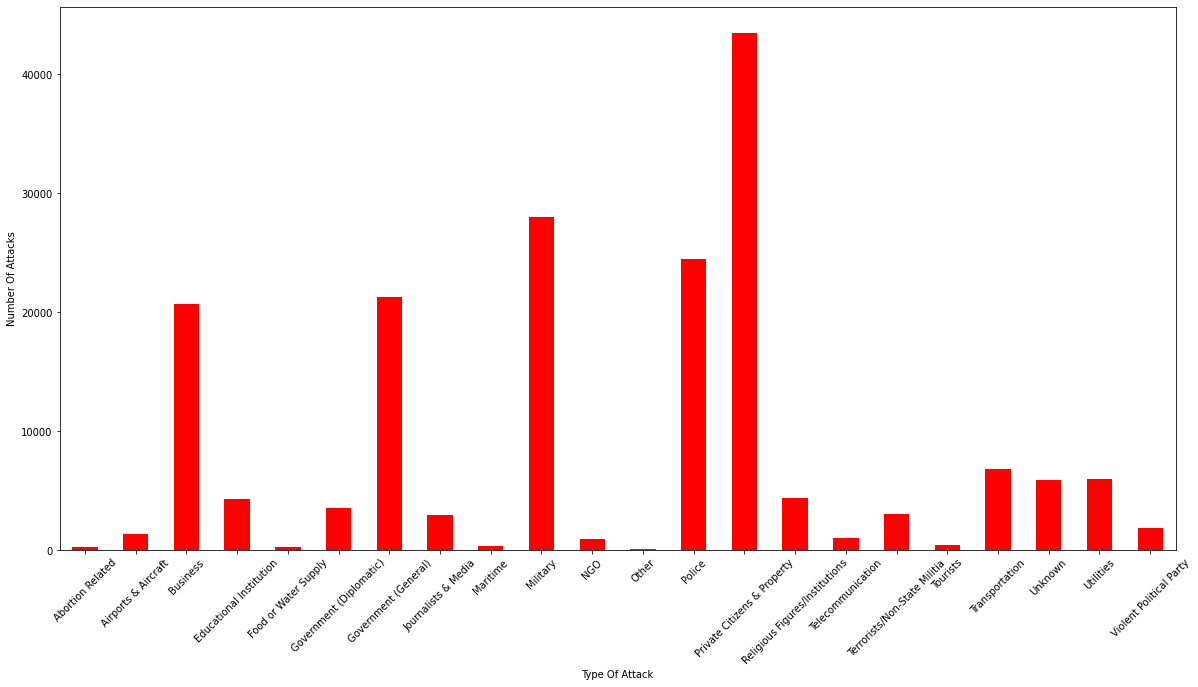

In [ ]:
# plotting possible targets for attacks
df.groupby(['targtype1_txt']).size().plot(kind='bar',color='r')
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Type Of Attack')
plt.ylabel('Number Of Attacks')
plt.xticks(rotation=45)

**Here are some of the conclusions that we can make by looking at the above graph:**
1. Private Citizens are the most targeted by terrorists, sometimes private citizens are killed/assasinated in targeted knife attacks and also if that private citizen is an influentual person, then bombings are also carried out.
2. Military and Police are second and third most targeted categories. This is mostly from countries like Iraq, India, Afghanistan, Pakistan and Colombia where security personnel are targeted the most by terrorists.
3. Business and Diplomatic missions are the fourth and fifth most targeted categories. Mostly Business are targeted in countries like Colombia by mostly drug gangs. Diplomatic Missions are one of the most sought after targets by Global Terrorists to target the government officials and diplomats of countries. 

**Let us visualize the Terror organizations that commit most of the terror attacks using a horizontal bar graph**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


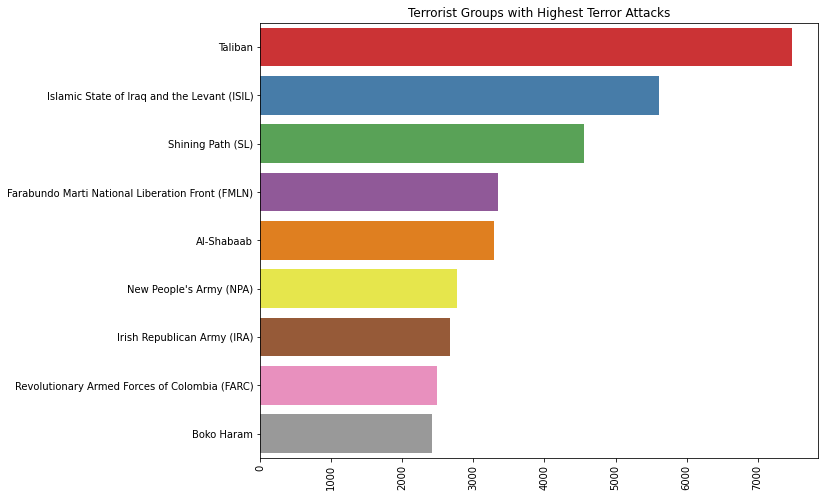

In [ ]:
#using seaborn to plot bar graph which displays the number of terrror attacks commited by various terror attacks.
sns.barplot(df['gname'].value_counts()[1:10].values,df['gname'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

**From the above graph, we can conclude that:**
Taliban is the terror group causing the most number of terror attacks followed by ISIL and Shining Path which are all based again in the most affected countries and regions of the world.

**Let us generate a heat map to see if we can find out any variables are affecting each other**

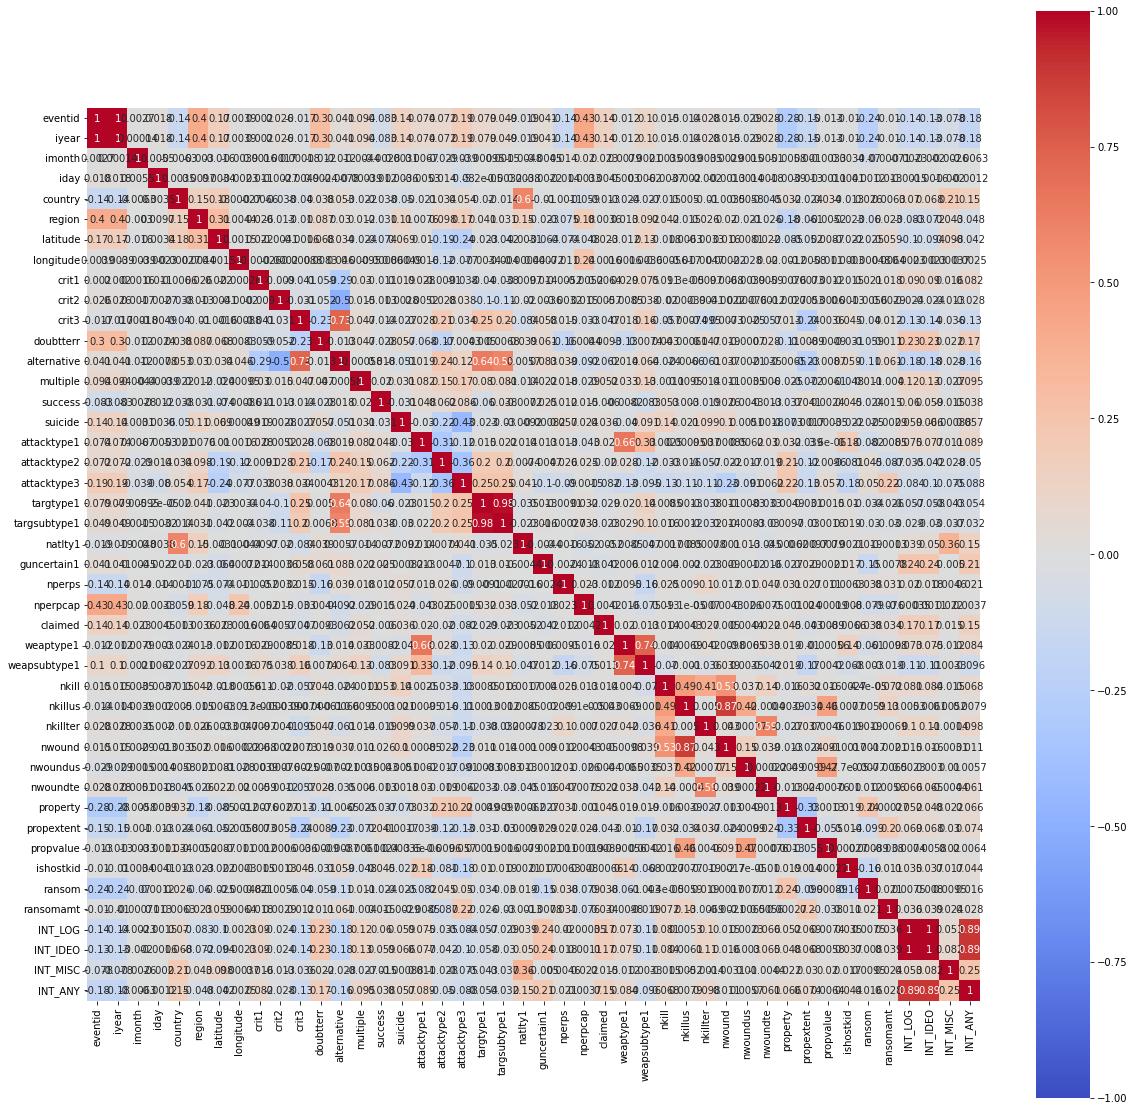

In [ ]:
# let's plot correlations inbetween the variables.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

**Nothing much can be concluded from the above heat map about the number of terror attacks and the various parameters present. But we have done other visulizations that have been far more helpful in understanding the Global Terrorism Dataset**

**Let us generate a WordCloud to see which are the most targeted cities by terrorists**
1. Importing of WordCloud and STOPWORDS packages from wordcloud library
2. Generating WordClouds, city with largest number of terror attacks is displayed in the largest size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  del sys.path[0]


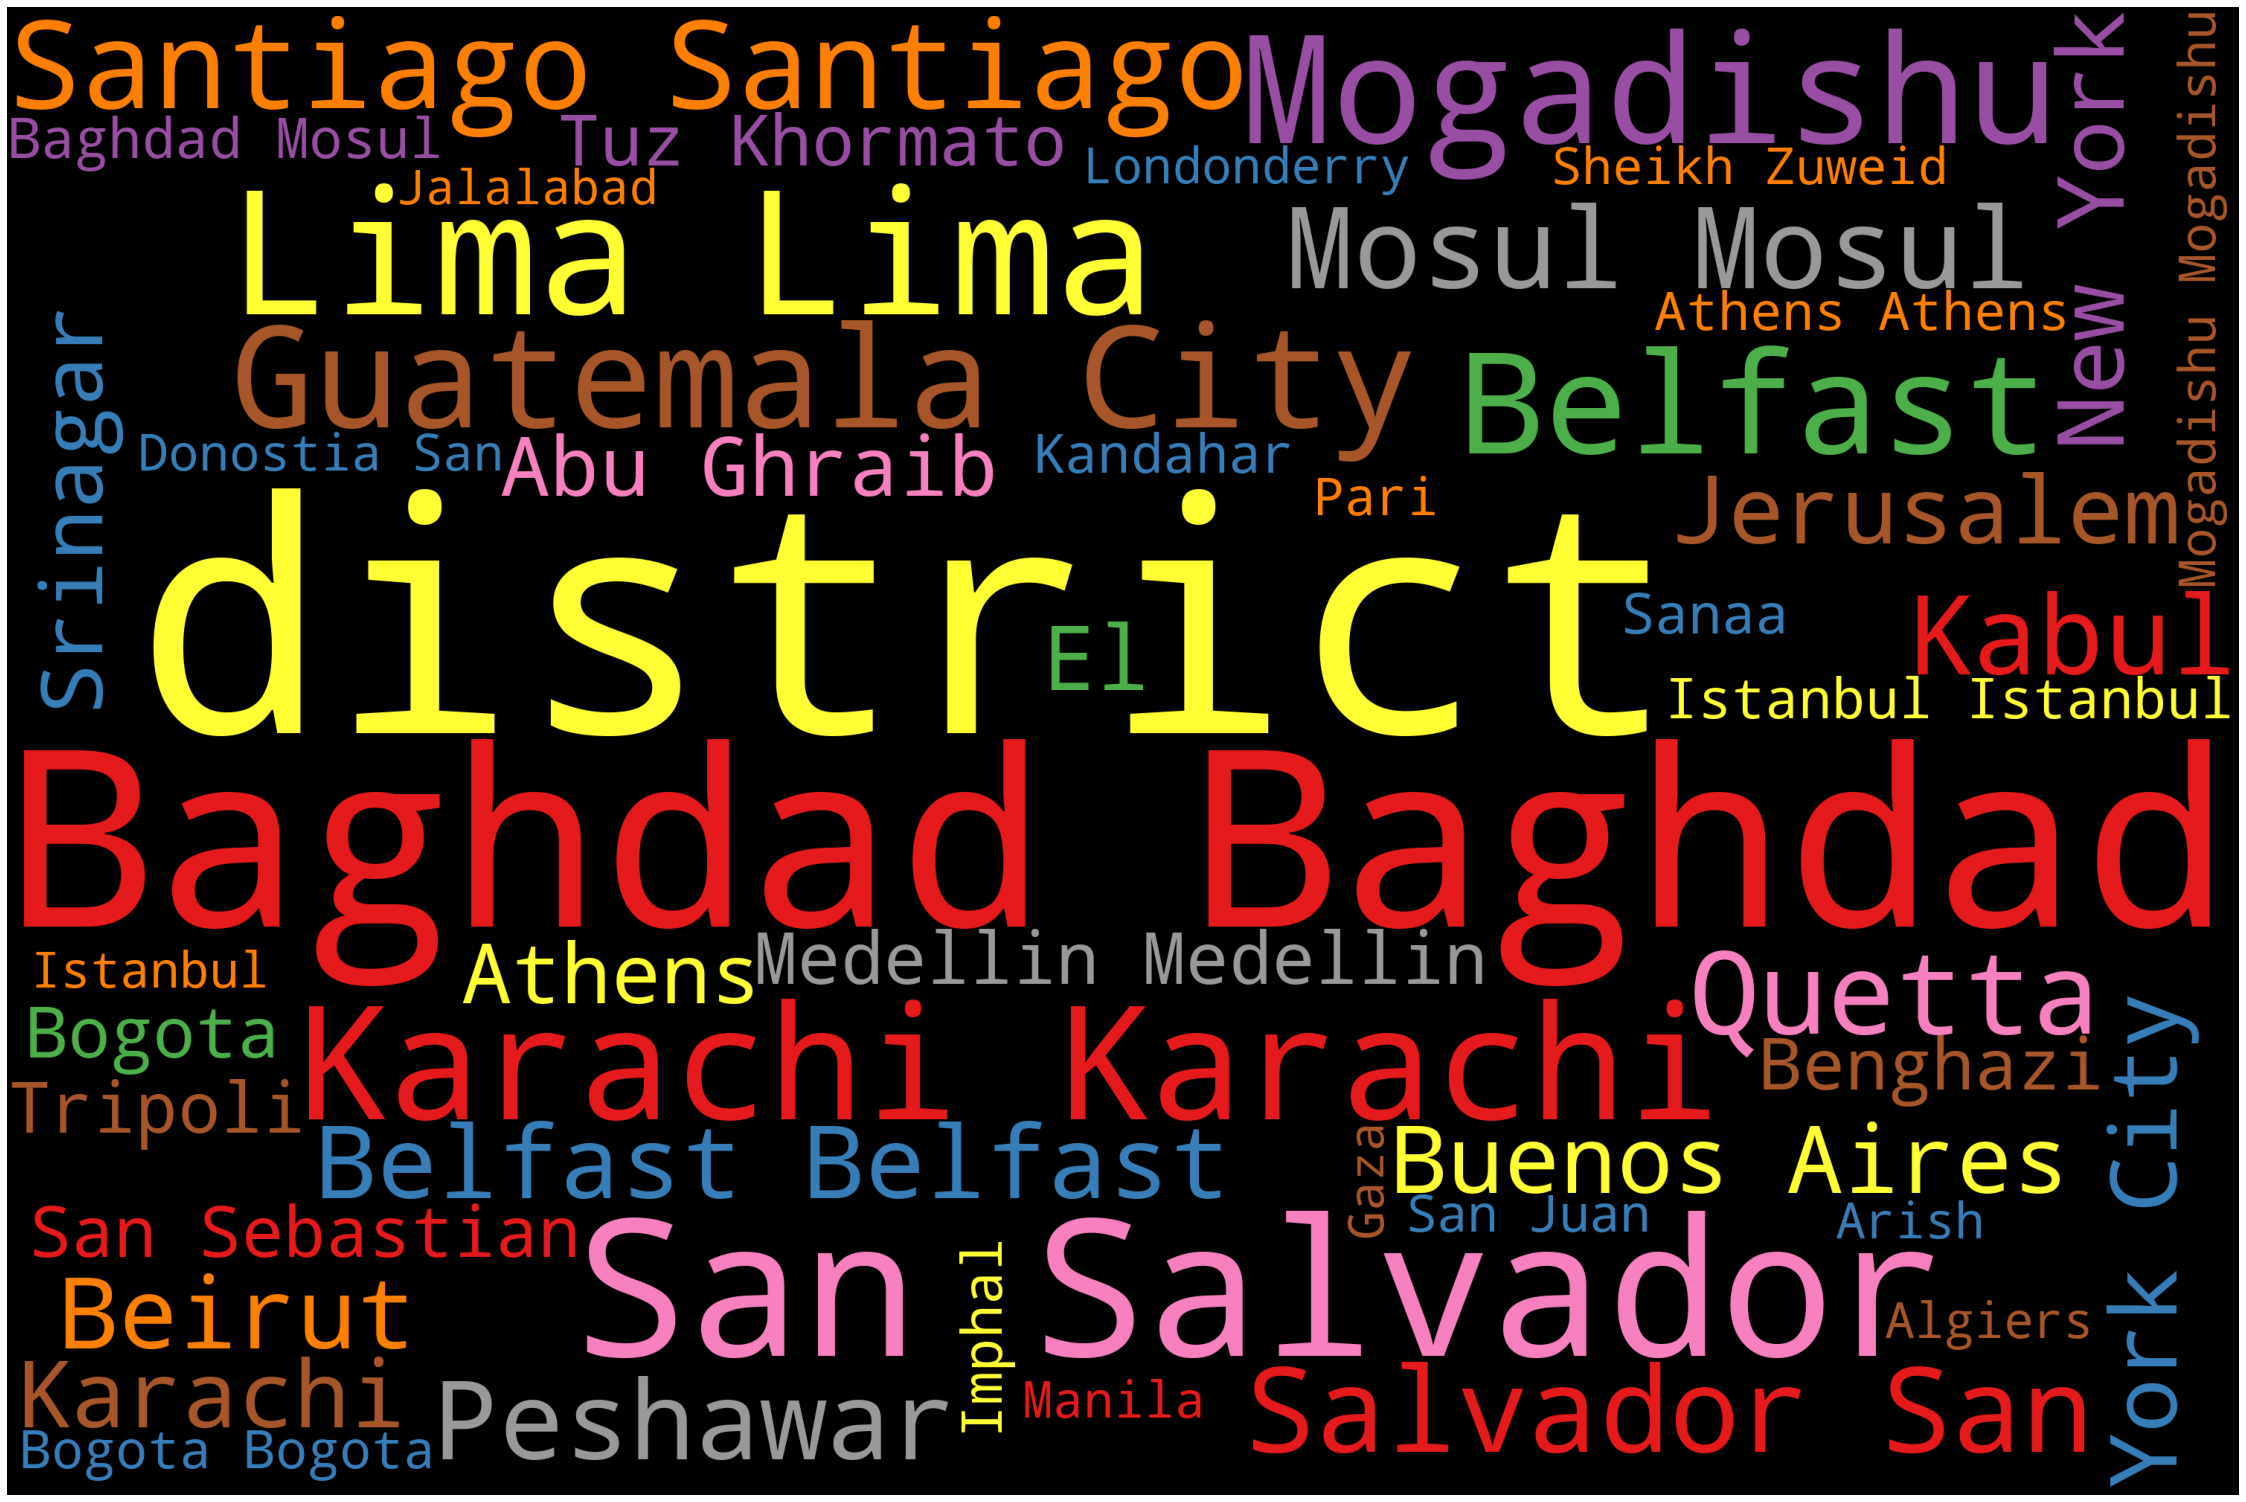

In [ ]:
# Define a function to plot word cloud
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud
from scipy import signal

data_city = df.copy()
data_city.drop(data_city.index[data_city['city'] == 'Unknown'], inplace = True)
cities = data_city.city.dropna(False)
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(' '.join(cities))
plot_cloud(wordcloud)

**From the above wordcloud generated, Baghdad is the most affected city in the world by terrorism, followed by San Salvador, Karachi and Guatemala city.**

**Conclusion:**
1. The Dataset chosen to Explore is the data on Global Terrorism. The entries in the data range from the year 1970 till late 2017.
2. AS seen from all the visualizations there has been an slight increasing trend in the number of terror attacks from 1970 onwards. But there was a slight dip from 1984 till 2004.
3. After 2004 the number of attacks see a sharp rise till 2014 and we have seen a decreasing trend since 2014.
4. The input parameter that does not affect the number of terror attacks is the month of the year, regardless of what month of the year it is the number of terror attacks remain almost same. Hence, the month of the year or seasonal changes cannot be used to predict the number of terror attacks.
5. We also saw the most preferred style of attack for any terrorist is Bombing/Explosion, second most preferred style of attack being Armed Assault(rifles) followed by Assasination.
6. Terrorists mostly attack Private citizens which can include any known public figure like a politician, influencer, social worker, etc.. They also mostly target bussineses and government assets like government embassies and Military and Police( Government Security personnel).
7. The most targeted countries are Iraq, Afghanistan, Pakistan, Inida and Colombia and the most targeted regions are - Middle East and North Africa, South Asia. These are the regions in which these countries are located and also these are the most backward and poorest regions of the world.

**So, to Conclude:** 
1. I would say that this is a great Data to work on, that is to Explore, Analyse and Visualize the type and targets of terror attacks across the globe.
2. One downside of this data is that most of the reasons why these attacks happen are political and cannot be determined by most of Machine Learning Algorithms, as the political situations can change drastically in a country or region, and it also influenced by a lot of vested interest groups that are not under the radar of many National Investigation Agencies.
3. But none the less, a lot of conclusions can be made from the type of terror attacks to the targets of terror attaks and also about the most vulnerable regions in the world to terror attacks.